In [5]:
import pandas as pd

# Load dataset
file_path = 'C:/Users/admin/Downloads/Dataset of Wakes Structure/Astar-0.9_Ustar-8_Re-4000_sample/sample/1/sixD_U_vorticity.csv'
data = pd.read_csv(file_path)

# Handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Feature Engineering
# Example: Adding a cumulative sum column for `U_0`
data['cumulative_U_0'] = data['U_0'].cumsum()

# Adding a new feature based on interaction of `vorticity` components
data['vorticity_magnitude'] = (data['vorticity_0']**2 + data['vorticity_1']**2 + data['vorticity_2']**2)**0.5

# 3. Rolling Mean and Standard Deviation (for U_0 over a window of 5 rows)
data['rolling_mean_U_0'] = data['U_0'].rolling(window=5).mean()
data['rolling_std_U_0'] = data['U_0'].rolling(window=5).std()

# 4. Normalized Features (Min-Max Normalization for U_0, U_1, U_2)
for col in ['U_0', 'U_1', 'U_2']:
    data[f'normalized_{col}'] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

# 5. Interaction Features
data['U0_vorticity0_interaction'] = data['U_0'] * data['vorticity_0']
data['U1_vorticity1_interaction'] = data['U_1'] * data['vorticity_1']
data['U2_vorticity2_interaction'] = data['U_2'] * data['vorticity_2']

# 6. Time Differences (Delta Features)
data['delta_U_0'] = data['U_0'].diff()
data['delta_U_1'] = data['U_1'].diff()
data['delta_U_2'] = data['U_2'].diff()

# 7. Ratios
data['U0_to_U1_ratio'] = data['U_0'] / (data['U_1'] + 1e-6)  # Avoid division by zero
data['U1_to_U2_ratio'] = data['U_1'] / (data['U_2'] + 1e-6)



# Save the processed data
processed_file_path = 'C:/Users/admin/Downloads/Dataset of Wakes Structure/Astar-0.9_Ustar-8_Re-4000_sample/sample/1/processed_sixD_U_vorticity.csv'
data.to_csv(processed_file_path, index=False)

# Display processed data preview
data.head()


Missing Values:
 y              0
U_0            0
U_1            0
U_2            0
vorticity_0    0
vorticity_1    0
vorticity_2    0
dtype: int64


,y,U_0,U_1,U_2,vorticity_0,vorticity_1,vorticity_2,cumulative_U_0,vorticity_magnitude,rolling_mean_U_0,...,normalized_U_1,normalized_U_2,U0_vorticity0_interaction,U1_vorticity1_interaction,U2_vorticity2_interaction,delta_U_0,delta_U_1,delta_U_2,U0_to_U1_ratio,U1_to_U2_ratio
0,-5.00000,0.200086,0.000183,-1.810876e-23,3.140204e-22,3.855599e-20,-1.206183e-08,0.200086,1.206183e-08,NaN,...,0.736174,0.785527,6.283114e-23,7.046416e-24,2.184249e-31,NaN,NaN,NaN,1088.856831,182.758032
1,-4.98999,0.200086,0.000184,-1.814220e-23,2.558899e-22,3.901269e-20,-1.299212e-08,0.400172,1.299212e-08,NaN,...,0.736485,0.785524,5.120004e-23,7.159096e-24,2.357055e-31,8.734000e-09,7.488102e-07,-3.343461e-26,1084.437816,183.506842
2,-4.97998,0.200086,0.000184,-1.817563e-23,1.977594e-22,3.946940e-20,-1.392240e-08,0.600259,1.392240e-08,NaN,...,0.736796,0.785522,3.956893e-23,7.272460e-24,2.530484e-31,8.735000e-09,7.488102e-07,-3.343461e-26,1080.054525,184.255653
3,-4.96997,0.200086,0.000185,-1.820907e-23,1.396289e-22,3.992611e-20,-1.485268e-08,0.800345,1.485268e-08,NaN,...,0.737106,0.785519,2.793782e-23,7.386508e-24,2.704535e-31,8.734000e-09,7.488102e-07,-3.343461e-26,1075.706527,185.004463
4,-4.95996,0.200086,0.000186,-1.824250e-23,8.149843e-23,4.038281e-20,-1.578297e-08,1.000431,1.578297e-08,0.200086,...,0.737417,0.785517,1.630671e-23,7.501240e-24,2.879208e-31,8.735000e-09,7.488102e-07,-3.343461e-26,1071.393396,185.753273


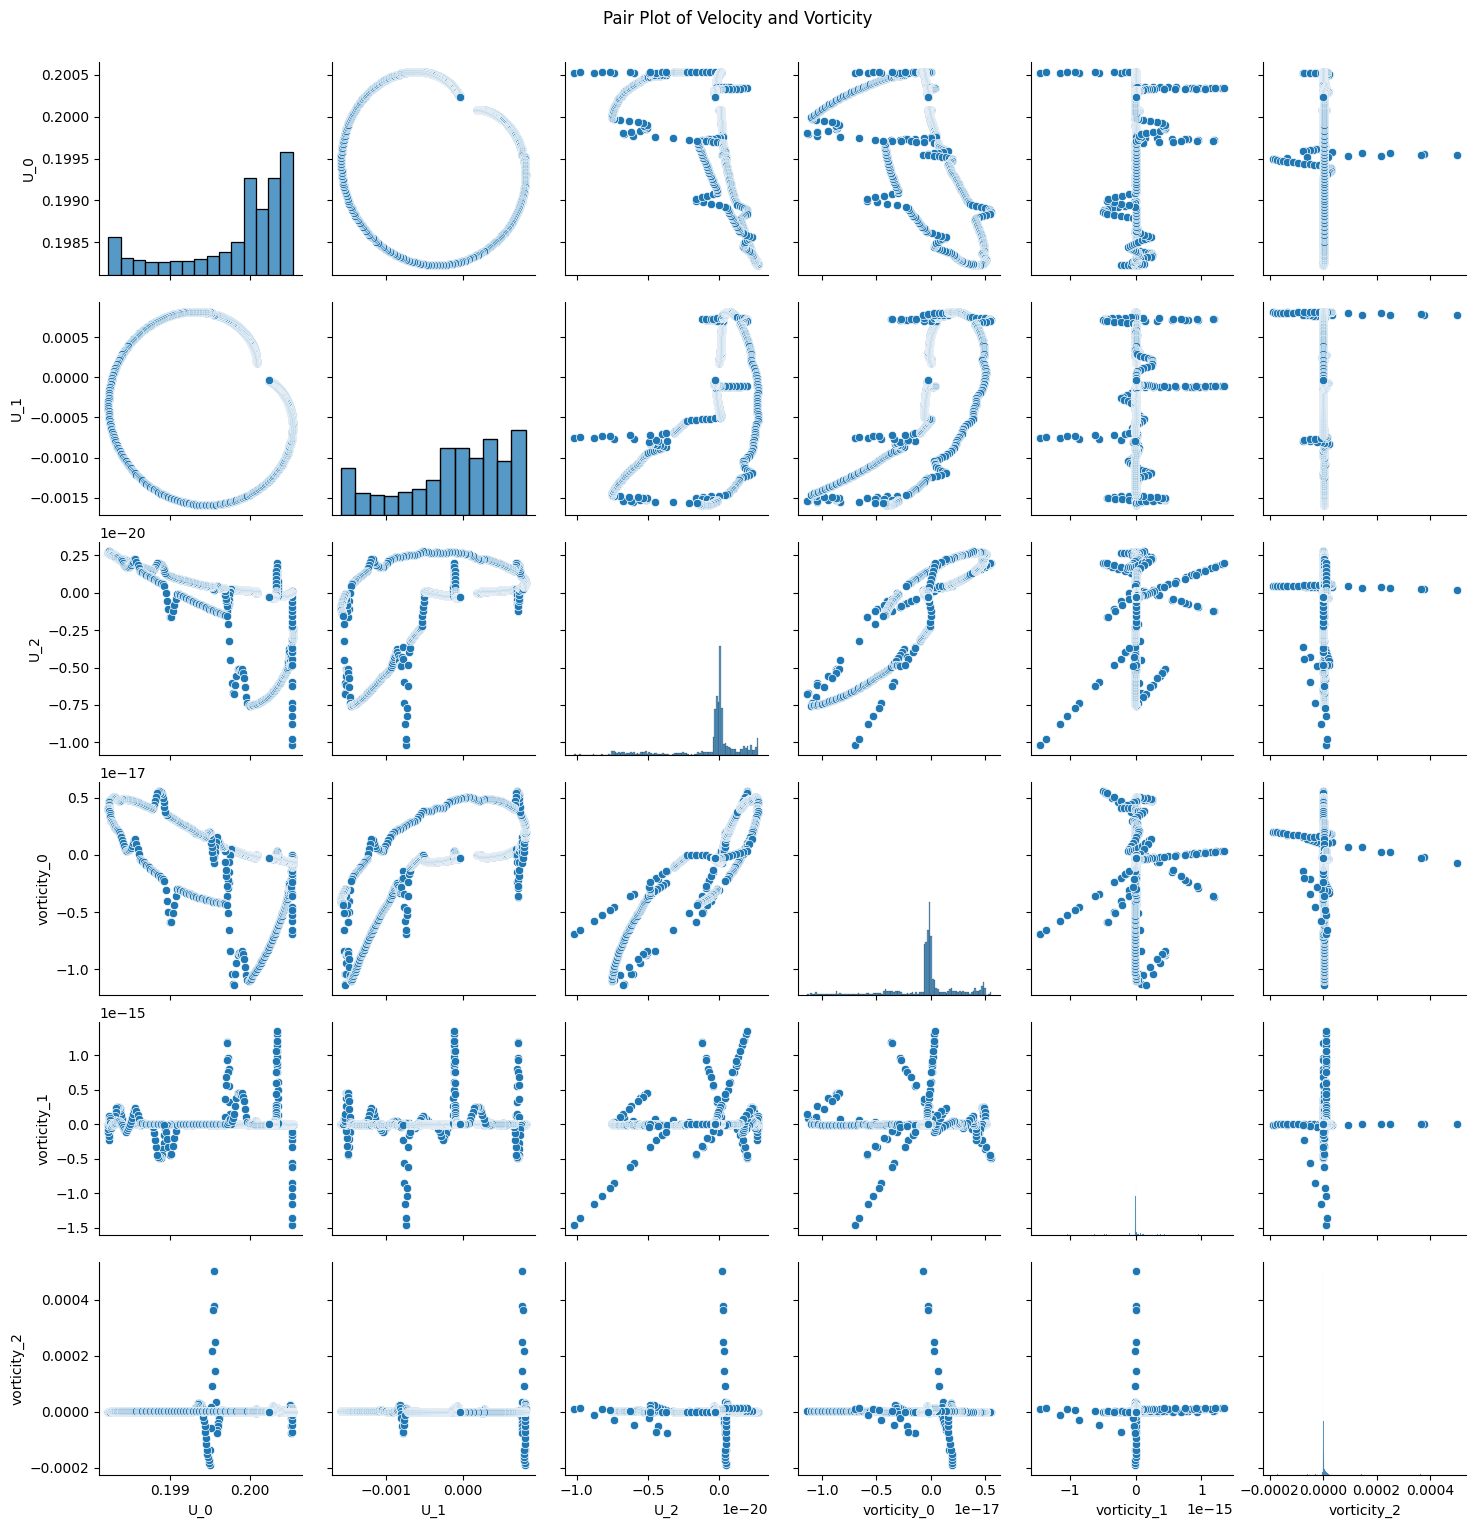

Summary Statistics for the Dataset:

                  y          U_0          U_1           U_2   vorticity_0  \
count  1.000000e+03  1000.000000  1000.000000  1.000000e+03  1.000000e+03   
mean   2.273737e-16     0.199837    -0.000117 -4.503761e-22 -4.282679e-19   
std    2.891085e+00     0.000674     0.000693  2.275764e-21  2.981780e-18   
min   -5.000000e+00     0.198227    -0.001591 -1.018424e-20 -1.139051e-17   
25%   -2.500000e+00     0.199547    -0.000520 -3.036959e-22 -5.681426e-19   
50%   -4.999473e-15     0.200071    -0.000057  6.418106e-23 -1.779225e-19   
75%    2.500000e+00     0.200340     0.000420  2.933616e-22  2.101976e-19   
max    5.000000e+00     0.200540     0.000818  2.757555e-21  5.553760e-18   

        vorticity_1   vorticity_2  cumulative_U_0  vorticity_magnitude  \
count  1.000000e+03  1.000000e+03     1000.000000         1.000000e+03   
mean   1.851850e-17  1.378502e-06       99.964155         6.477538e-06   
std    1.916308e-16  3.060583e-05       57.6680

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
file_path = 'C:/Users/admin/Downloads/Dataset of Wakes Structure/Astar-0.9_Ustar-8_Re-4000_sample/sample/1/processed_sixD_U_vorticity.csv'
data = pd.read_csv(file_path)

# 2. Pair Plots
sns.pairplot(data[['U_0', 'U_1', 'U_2', 'vorticity_0', 'vorticity_1', 'vorticity_2']])
plt.suptitle('Pair Plot of Velocity and Vorticity', y=1.02)
plt.show()

# 3. Summary Statistics
summary_stats = data.describe()

# Display summary statistics
print("Summary Statistics for the Dataset:\n")
print(summary_stats)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   y                          1000 non-null   float64
 1   U_0                        1000 non-null   float64
 2   U_1                        1000 non-null   float64
 3   U_2                        1000 non-null   float64
 4   vorticity_0                1000 non-null   float64
 5   vorticity_1                1000 non-null   float64
 6   vorticity_2                1000 non-null   float64
 7   cumulative_U_0             1000 non-null   float64
 8   vorticity_magnitude        1000 non-null   float64
 9   rolling_mean_U_0           996 non-null    float64
 10  rolling_std_U_0            996 non-null    float64
 11  normalized_U_0             1000 non-null   float64
 12  normalized_U_1             1000 non-null   float64
 13  normalized_U_2             1000 non-null   float6

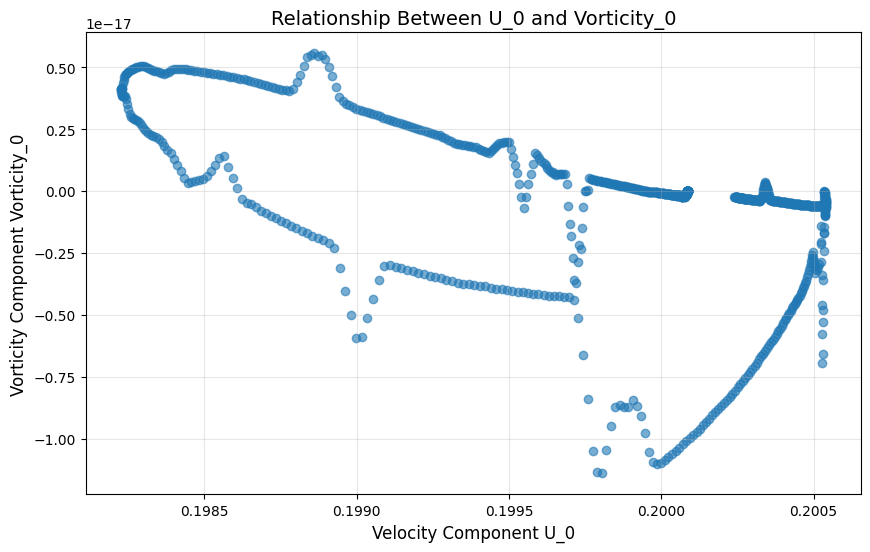

In [10]:
import pandas as pd

# Load the dataset to explore its structure
file_path = 'C:/Users/admin/Downloads/Dataset of Wakes Structure/Astar-0.9_Ustar-8_Re-4000_sample/sample/1/processed_sixD_U_vorticity.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
data.head(), data.info()

from scipy.stats import pearsonr

# Hypothesis testing: Correlation between U_0 and vorticity_0
correlation_coefficient, p_value = pearsonr(data['U_0'], data['vorticity_0'])

correlation_coefficient, p_value

import matplotlib.pyplot as plt

# Create a scatter plot to visually represent the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['U_0'], data['vorticity_0'], alpha=0.6)
plt.title('Relationship Between U_0 and Vorticity_0', fontsize=14)
plt.xlabel('Velocity Component U_0', fontsize=12)
plt.ylabel('Vorticity Component Vorticity_0', fontsize=12)
plt.grid(alpha=0.3)
plt.show()




Model Comparison Metrics:
               Model           MSE       R^2
0  Linear Regression  2.658650e-07  0.317895
1      Decision Tree  2.512625e-07  0.355359

Feature Importance (Decision Tree):
       Feature  Importance
4  vorticity_2    0.618918
0          U_1    0.381082
1          U_2    0.000000
2  vorticity_0    0.000000
3  vorticity_1    0.000000


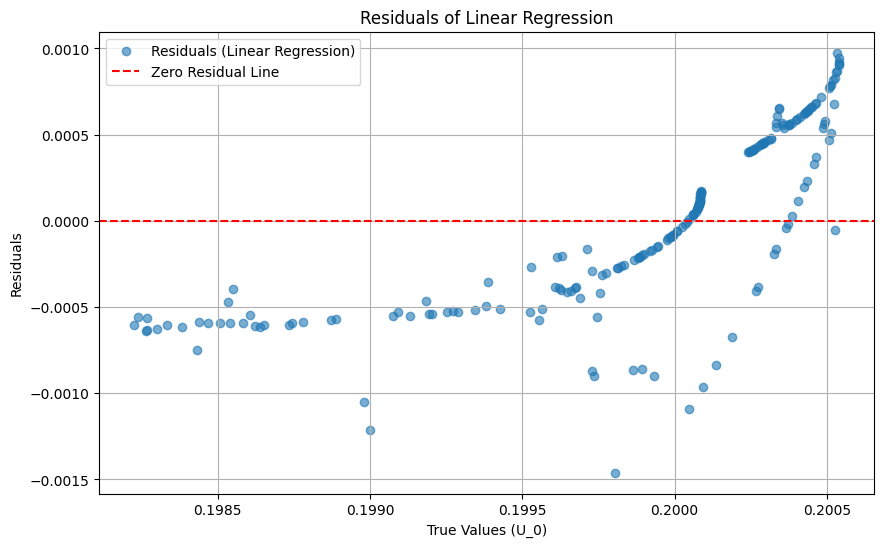

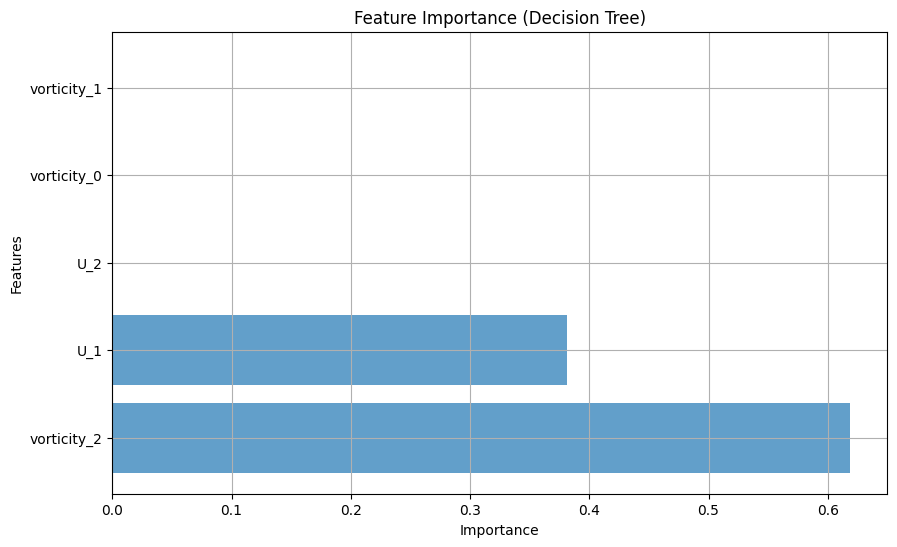

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target variable
features = data[['U_1', 'U_2', 'vorticity_0', 'vorticity_1', 'vorticity_2']]
target = data['U_0']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Metrics for Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Summary of Results
results = {
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [mse_linear, mse_tree],
    'R^2': [r2_linear, r2_tree]
}

import pandas as pd
results_df = pd.DataFrame(results)

# Display the results in a simplified way
print("Model Comparison Metrics:")
print(results_df)

# Recreate the feature importance DataFrame to resolve the issue
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Decision Tree):")
print(feature_importance)

# Visualizing residuals for Linear Regression
residuals_linear = y_test - y_pred_linear

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_linear, alpha=0.6, label='Residuals (Linear Regression)')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of Linear Regression')
plt.xlabel('True Values (U_0)')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# Visualizing feature importance for Decision Tree
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], alpha=0.7)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


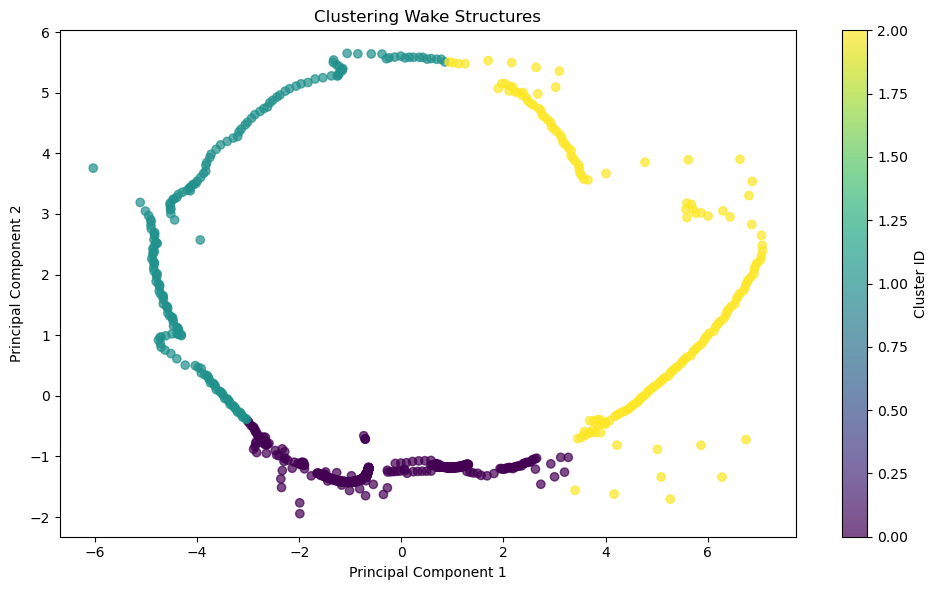

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select features for clustering (excluding non-relevant or dependent variables like 'y')
features = data.drop(columns=['y'])

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clustering Wake Structures')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.tight_layout()
plt.show()


Mean Squared Error: 5.101728355001394e-05
R-squared: 0.9999937703781683


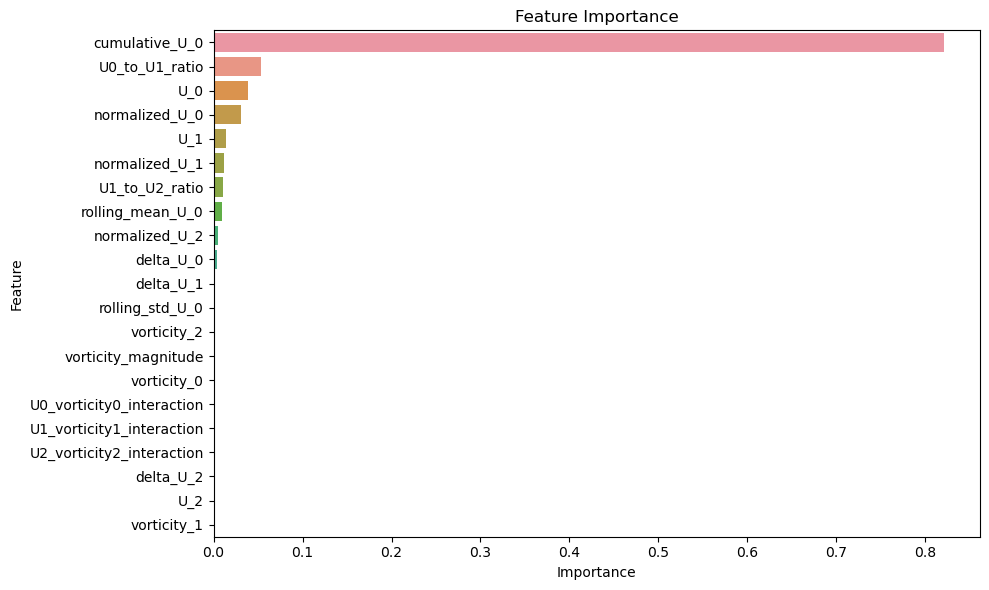

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest Regressor
reg = RandomForestRegressor(random_state=42, n_estimators=100)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize Feature Importance
feature_importances = reg.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Load the dataset
file_path = '/mnt/data/processed_sixD_U_vorticity.csv'
data = pd.read_csv(file_path)

# Define target and features (assuming 'y' is the target variable)
X = data.drop(columns=['y']).values  # Features as numpy array
y = data['y'].values  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for Conv1D (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_scaled.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Use 'softmax' for classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Mean Absolute Error: {mae}")

# Predictions
y_pred = model.predict(X_test)

# Visualize Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
